In [1]:

#THERE ARE TWO TYPES OF STATISTICS
#1_DESCRIPTIVE STATISTICS- IT IDENTIFIES THE IMPORTANT ELEMENT IN A DATASET 
#2_INFERENTIAL STATISTICS- IT EXPLAIN THOSE ELEMENTS VIA RELATIONSHIPS WITH OTHER ELEMENTS

In [2]:
#DESCRIPTIVE STATISTICS HAS 3 TYPES.....THEY ARE
#1_UNIVARIATE- IT HELPS TO SUMMARIZE A SINGLE VARIABLE(UNIVARIATE INCLUDES- MEASURES OF (FREQUENCY,CENTRAL TENDENCY,DISPERSION))
#MEASURES OF FREQUENCY CAN BE DONE BY(Frequency Tables and Histogram)
#MEASURES OF CENTRAL TENDENCY CAN BE DONE BY (AVREAGE(MEAN),MEDIAN,MODE,Geometric Mean and Harmonic Mean)
#MEASURES OF DISPERSION CAN BE DONE BY (RANGE(max-min),INTER_QUARTILE RANGE(IQR),STANDARD DEVIATION AND VARIANCE)
#2_BIVARIATE- IT HELPS TO SUMMARIZE THE RELATIONSHIP BETWEEN TWO VARIABLES(BIVARIATE INCLUDES- MEASURES OF CORRELATION AND COVARIANCE)
#COVARIENCE - MEASURES RELATIONSHIP B\W TWO VAIABLES
#CORRELATION- IT IS SIMILAR TO COVARIENCE
#3_MULTIVARIATE- IT HELPS TO SUMMARIZE THE RELATIONSHIP BETWEEN MULTIPLE VARIABLE(MULTIVARIATE INCLUDES- MEASURES OF 
#CORRELATION MATRIX AND COVARIENCE MATRIX)

In [3]:
#EXCERSICE-MEAN,MEDIAN AND MODE
import numpy as np
import scipy
from scipy import stats
speed=[99,86,87,88,11,86,103,87,94,778,77,85,86]
print(np.mean(speed))
print(np.median(speed))
print(stats.mode(speed)) #NUMPY DOES NOT HAVE A MODULE NAMED MODE....SO WE ARE IMPORTING STATS FROM SCIPY WHICH HAS A MODULE NAMED MODE

135.92307692307693
87.0
ModeResult(mode=array([86]), count=array([3]))


In [4]:
import numpy as np
versicolor_petal_length=np.array([1.2,2.4,5.6,7.8,8.3,1.5,2.3,2.4,2.7,3.4,5.1,1.8])
percentiles=np.array([2.5,25,50,75,97.5])
ptiles_verse=np.percentile(versicolor_petal_length,percentiles)
print(ptiles_verse)

[1.2825 2.175  2.55   5.225  8.1625]


In [5]:
#lengthy approach
differences=versicolor_petal_length-np.mean(versicolor_petal_length)
diff_sq=differences**2
varience_explicit=np.mean(diff_sq)
print(varience_explicit)

5.389097222222222


In [6]:
#easy way to find the VARIENCE would be using the np.var command....as follows
varience=np.var(versicolor_petal_length)
print(varience)

5.389097222222222


In [7]:
#standard deviation
print(np.std(versicolor_petal_length))

2.321442918148586


In [8]:
import pandas as pd
import seaborn as sns
tips=sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
tips["tip"].cov(tips["total_bill"])

8.323501629224856

In [10]:
tips["tip"].corr(tips["total_bill"])

0.6757341092113647

In [11]:
#INFERENTIAL STATISTICS HAS 2 TYPES ....THEY ARE
#1_HYPOTHESIS TESTING-      
#2_MODEL FITTING-

#TOPICS THAT WE ARE GONNA COVER UNDER THIS STUFF
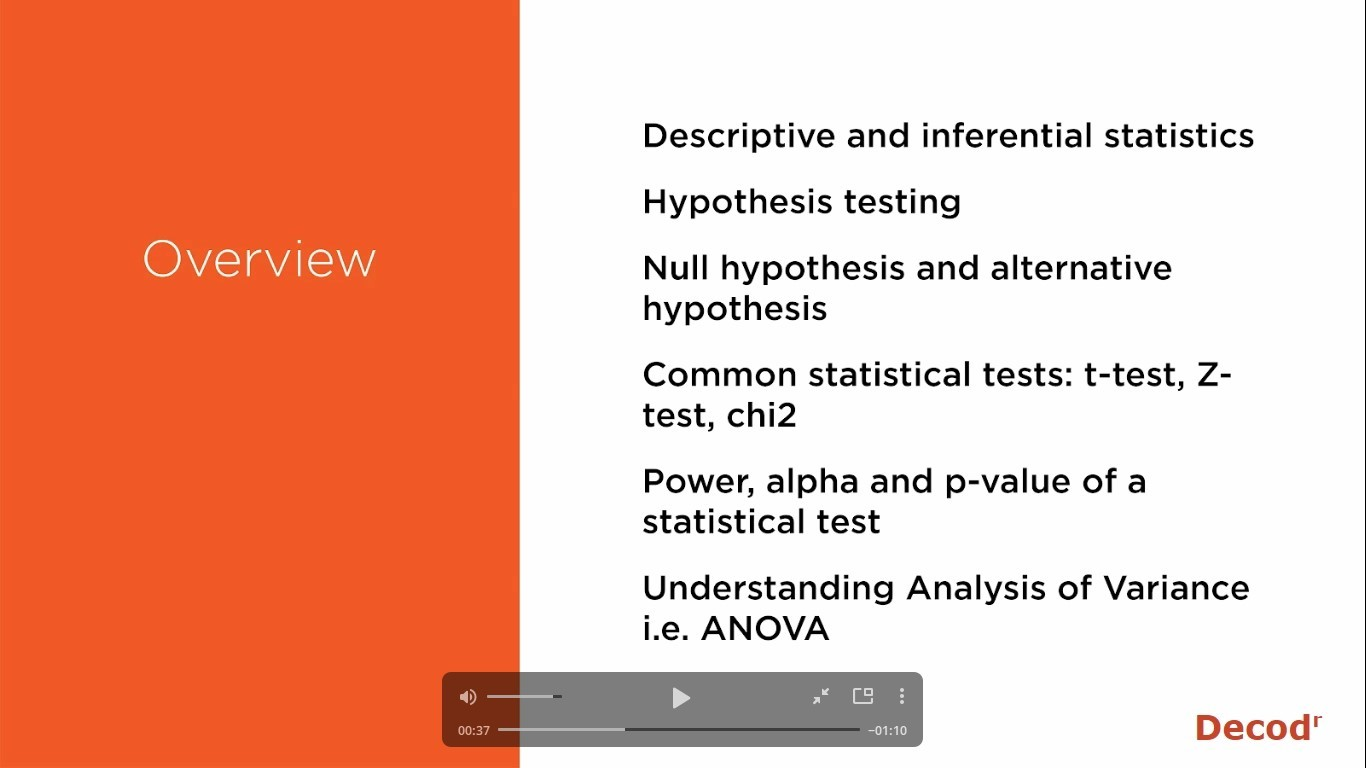

# HYPOTHESIS TESTING
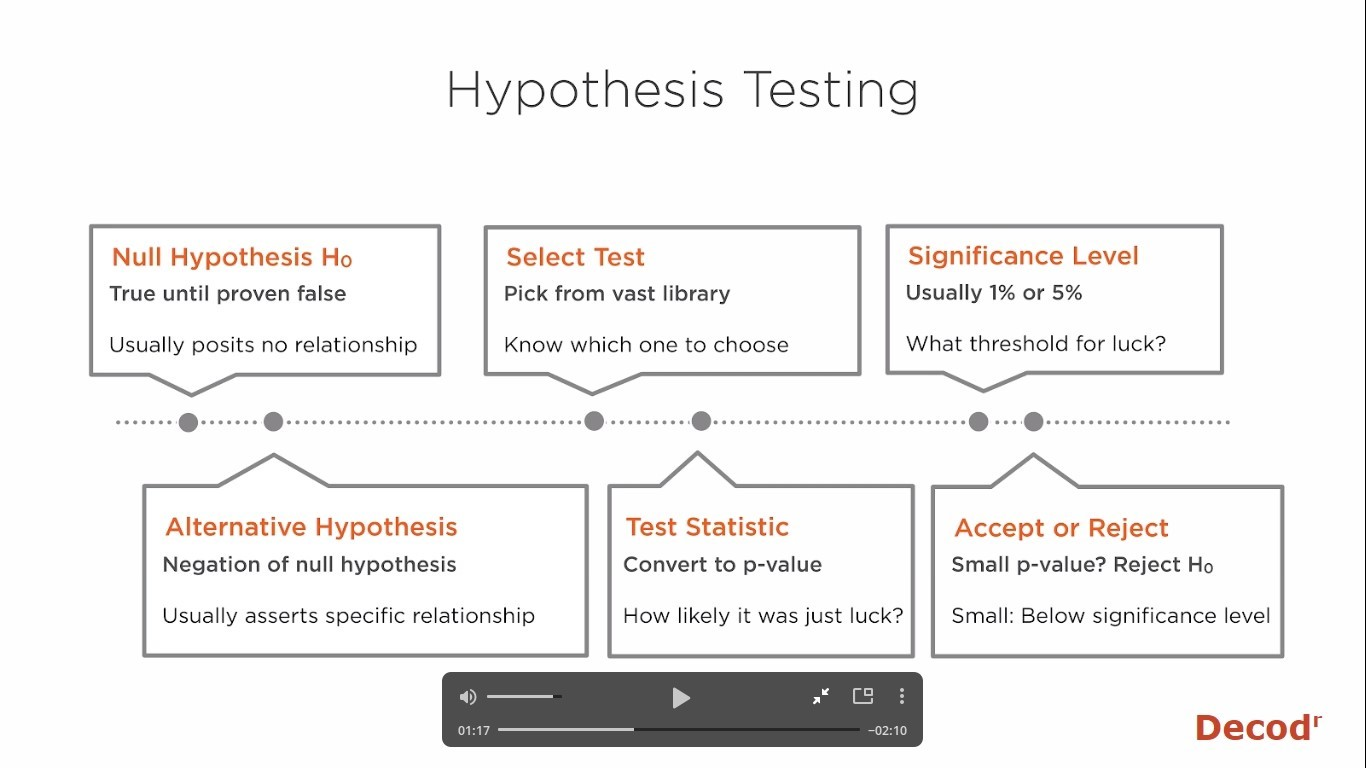


# t-test....there are 4 types of T-TESTS
THEY ARE....
ONE SAMPLE LOCATION TEST...
TWO SAMPLE LOCATION TEST..
PAIRED DIFFERENCE TEST...
REGRESSION COEFFICIENT TEST

In [12]:
#1_ONE SAMPLE LOCATION-- IT ASSUMES THAT THE AVERAGE OF A PARTICULAR REGION IS EQUAL(=) TO THE AVERAGE OF THE WHOLE POPULATION
#Z TEST-are statistical calculations that can be used to compare population means to a sample MEANS.(SIMILAR TO..ONE SAMPLE)
#2_TWO SAMPLE LOCATION- IT RELATES B\W TWO LOCATION'S MEAN AND VARIENCE(LEVENE'S TEST COMES UNDER THIS TEST)
#LEVENE'S TEST- THIS IS USED TO TEST THE EQUALITY OF VARIANCES....IF THIS TEST IS NOT TRUE(THAT IS THE VARIENCE OF 
#BOTH LOCATION DIFFERS)...WE OUGHT TO MOVE FOR "WELCH'S TEST" 
#3_PAIRED DIFFERENCE TEST- HERE WE GO THROUGH A SINGLE SAMPLE(LOCATION)....COMPARITIVELY WITH DIFFERENT CONDITIONS..
#WILCOXO SIGNED-RANK TEST-IT'S AN ALTERNATIVE METHOD FOR PAIRED DIFF TEST....USED TO COMPARE "MEDIAN"
#4_REGRESSION COeFFICIENT TEST- IT CHECKS WHETHER THE COEFFICIENT OF ANY OF THE INDEPENDENT VARIABLES > 0

In [13]:
#NOTE-- WHEN WE COMPARE TWO GRPS....T-TEST IS ENOUGH...WHEREAS WHEN WE OUGHT TO GO THROUGH A LARGE NUMBER OF GROUPS
#       WE WILL SWITCH TO "ANOVA"       

# here we are gonna do an excersice...in Which we will find how to code a hypothesis testing (T-TEST...!)

In [14]:
#excercise
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import researchpy as rp
from scipy import stats
from sklearn.preprocessing import scale

In [15]:
bike_sharing_data= pd.read_csv("D:DATASETS/day.csv")
bike_sharing_data.shape

(731, 16)

In [16]:
bike_sharing_data=bike_sharing_data[['season','mnth','holiday','workingday','weathersit','temp','cnt']]

In [17]:
bike_sharing_data.to_csv("D:DATASETS/bike_sharing_data.csv",index=False)

In [18]:
bike_sharing_data.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


In [19]:
bike_sharing_data['season'].unique() 
# 1= SPRING
# 2= SUMMER
# 3= AUTUMN/FALL
# 4= WINTER

array([1, 2, 3, 4], dtype=int64)

In [20]:
bike_sharing_data['holiday'].unique()
# 0= NOT WORKING DAY
# 1= WORKING DAY

array([0, 1], dtype=int64)

In [21]:
bike_sharing_data['workingday'].unique()
# 0= NO HOLIDAY
# 1= HOLIDAY

array([0, 1], dtype=int64)

In [22]:
bike_sharing_data['weathersit'].unique()
# 1= DAY WAS CLEAR WITH SOME CLOUDS
# 2= MISTY AND A CLOUDY DAY
# 3= LIGHT SNOWS....RAIN OR THUNDER STORMS

array([2, 1, 3], dtype=int64)

In [23]:
bike_sharing_data['temp'].describe()

count    731.000000
mean       0.495385
std        0.183051
min        0.059130
25%        0.337083
50%        0.498333
75%        0.655417
max        0.861667
Name: temp, dtype: float64

In [24]:
bike_sharing_data.shape

(731, 7)

In [25]:
bike_sharing_data['workingday'].describe()

count    731.000000
mean       0.683995
std        0.465233
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: workingday, dtype: float64

In [26]:
bike_sharing_data.groupby('workingday')['cnt'].describe()
#HERE WE ARE JUST CHECKING/COMPARING BTW "WORKINGDAY" AND "NON WORKINGDAY"....WITH THEIR RESPECTIVE..COUNT,MEAN AND STD 

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,231.0,4330.168831,2052.141245,605.0,2710.50,4459.0,5907.5,8714.0
1,500.0,4584.820000,1878.415583,22.0,3344.25,4582.0,5987.5,8362.0


<AxesSubplot:title={'center':'cnt'}, xlabel='workingday'>

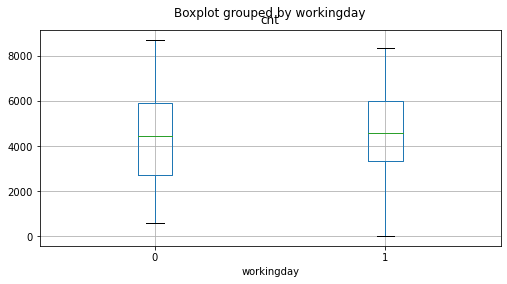

In [27]:
bike_sharing_data.boxplot(column=['cnt'],by='workingday',figsize=(8,4))
#in thiS boxplot....the center line denotes the MEDIAN....and the whole box is the INTERQUARTILE RANGE(IQR)
#IQR- IT IS THE midspread/middle 50% or H‑spread. It is defined as the difference between the 75th and 25th 
#percentiles of the data(IN DESCRIPTIVE STATISTICS)

In [28]:
sample_1= bike_sharing_data[(bike_sharing_data['workingday'] ==1)]
sample_2=bike_sharing_data[(bike_sharing_data['workingday'] ==0)]

In [29]:
sample_1.shape,sample_2.shape

((500, 7), (231, 7))

In [30]:
sample_1= sample_1.sample(231)
sample_1.shape,sample_2.shape

((231, 7), (231, 7))

In [31]:
stats.levene(sample_1['cnt'],sample_2['cnt'])

LeveneResult(statistic=6.390466554304096, pvalue=0.011807166692976784)

(array([ 5., 13., 19., 30., 44., 34., 41., 20., 16.,  9.]),
 array([-2.40839769, -1.94350091, -1.47860413, -1.01370735, -0.54881057,
        -0.08391379,  0.38098299,  0.84587977,  1.31077655,  1.77567333,
         2.2405701 ]),
 <BarContainer object of 10 artists>)

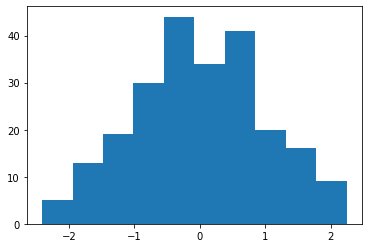

In [32]:
diff= scale(np.array(sample_1['cnt'])- np.array(sample_2['cnt'],dtype=float))
plt.hist(diff)
#HERE WE ARE CALCULATING THE RESIDUALS B/W 2 GROUPS...BY SIMPLY CALCULATING THE DIFFERENCES B/W THE "SAMPLES"
#THE SCALE FUNCTION COMES FROM SCIKIT-LEARN MODULE
#THE SCALE FUNCTION IS ACTUALLY "STANDARDIZING OUR RESULTS"
#STANDARDIZING MEANS... THE SCALE FUNCTION "SUBSTRACTS THE MEAN FROM EVERY VALUE"....AND DIVIDES BY THE "STD"
#SO THAT THE RESULTING SAMPLES WILL HAVE "ZERO" MEAN AND UNIT VARIANCE...

# THE METHOD/PLOT THAT WE'VE USED ABOVE IS A KINDA ROUGH CHECK....IN ORDER TO GET A PROPER/FORMAL RESULT...WE USE                 "Q-Q PLOT/PROBABILITY PLOT

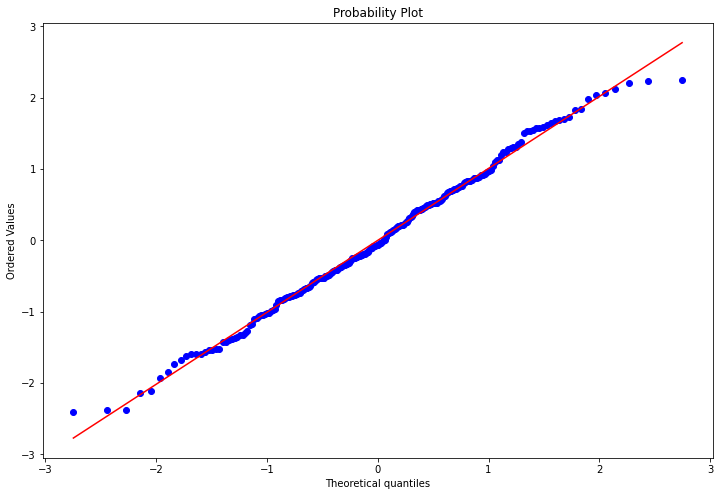

In [33]:
plt.figure(figsize=(12,8))
stats.probplot(diff, plot=plt, dist='norm') #dist= distribution and 'norm' = normal
plt.show()

In [34]:
#the red line is the quantile information for normally distributed DATA

In [35]:
#another way to check whether the RESIDUALS ARE NORMALLY DISTRIUTED IS TO USE THE...
# SHAPIRO-WEALTH TEST FOR NORMALITY

In [36]:
stats.shapiro(diff)

ShapiroResult(statistic=0.9930183291435242, pvalue=0.3496980667114258)

# independent t-test by using scipy-stats

In [37]:
stats.ttest_ind(sample_1['cnt'],sample_2['cnt'])

Ttest_indResult(statistic=1.2158116041847775, pvalue=0.22468026535839442)

# independent t-test by using researchpy

In [38]:
descriptives,results= rp.ttest(sample_1['cnt'],sample_2['cnt'])

In [39]:
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,cnt,231.0,4549.593074,1820.086135,119.752876,4313.640178,4785.545970
1,cnt,231.0,4330.168831,2052.141245,135.020981,4064.132702,4596.204960
2,combined,462.0,4439.880952,1940.592939,90.284554,4262.460678,4617.301226


In [40]:
results

,Independent t-test,results
0,Difference (cnt - cnt) =,219.4242
1,Degrees of freedom =,460.0000
2,t =,1.2158
3,Two side test p value =,0.2247
4,Difference < 0 p value =,0.8877
5,Difference > 0 p value =,0.1123
6,Cohen's d =,0.1131
7,Hedge's g =,0.1129
8,Glass's delta =,0.1206
9,Pearson's r =,0.0566


# the above test is completed.....
from here onwards...we are entering into a complete different stuff...

In [41]:
bike_sharing_data.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


<AxesSubplot:>

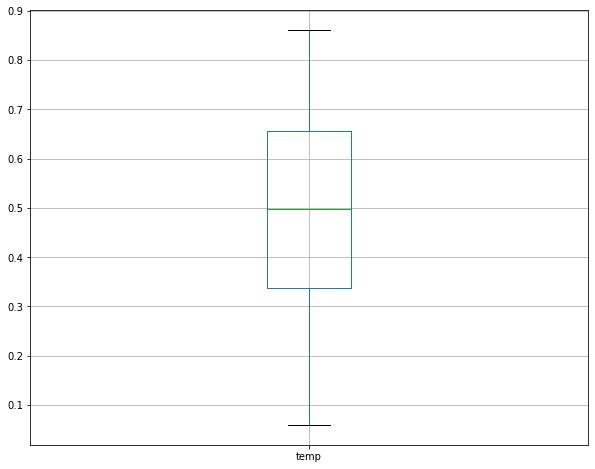

In [42]:
bike_sharing_data[['temp']].boxplot(figsize=(10,8))

In [43]:
bike_sharing_data['temp_category']= \
    bike_sharing_data['temp'] > bike_sharing_data['temp'].mean()

In [44]:
bike_sharing_data.sample(10)
#here true represents...hot day
#and false represents...cold day

,season,mnth,holiday,workingday,weathersit,temp,cnt,temp_category
572,3,7,0,1,1,0.776667,6861,True
57,1,2,0,0,1,0.343478,2402,False
98,2,4,0,0,2,0.342500,2455,False
494,2,5,0,1,2,0.575000,4717,True
62,1,3,0,1,2,0.261667,1944,False
218,3,8,0,0,1,0.742500,3785,True
628,3,9,0,1,1,0.546667,7720,True
430,1,3,0,1,1,0.258333,3956,False
655,4,10,0,1,1,0.455833,7461,False
234,3,8,0,1,1,0.640833,5895,True


In [45]:
bike_sharing_data.groupby('temp_category')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
temp_category,,,,,,,,
False,364.0,3387.664835,1691.340133,22.0,1964.5,3301.0,4513.5,8090.0
True,367.0,5611.904632,1475.698228,1115.0,4548.5,5336.0,6897.5,8714.0


# visualising the above stuffs...in BOX PLOT
#to get more idea about the difference...

<AxesSubplot:title={'center':'cnt'}, xlabel='temp_category'>

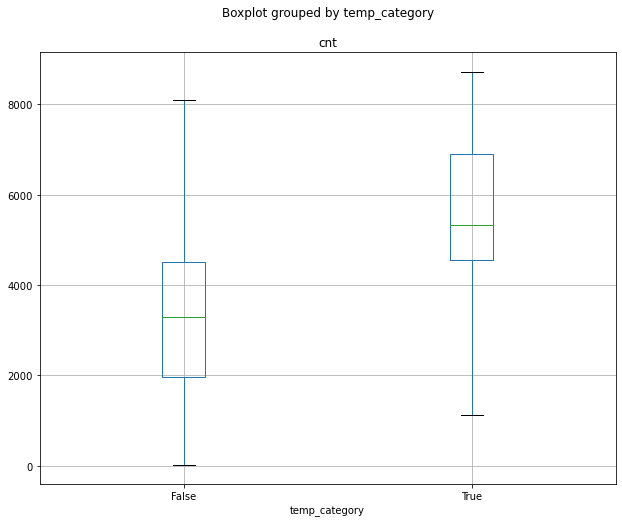

In [46]:
bike_sharing_data.boxplot(column=['cnt'],by='temp_category',figsize=(10,8))

# we can just proceed with the t-test as we did b4....so i'm just gonna skip this part...as i've done it already

In [47]:
#NOTE...IF P-VALUE OF NULL HYPOTHESIS(H(NOT)) IS LESS THAN "5%"....IT MEANS THAT THE NULL HYPOTHESIS MUST BE WRONG....AND
#WE OUGHT MOVE ALONG WITH OUR ALTERNATIVE HYPOTHESIS
# FOR EXAMPLE--
#Example : you have a coin and you don’t know whether that is fair or tricky so let’s decide null and alternate hypothesis
#H0 : a coin is a fair coin.
#H1 : a coin is a tricky coin. and alpha = 5% or 0.05
#Now let’s toss the coin and calculate p- value ( probability value).
#Toss a coin 1st time and result is tail- P-value = 50% (as head and tail have equal probability)
#Toss a coin 2nd time and result is tail, now p-value = 50/2 = 25%
#and similarly we Toss 6 consecutive time and got result as P-value = 1.5% but 
#we set our significance level as 95% means 5% error rate we allow and 
#here we see we are beyond that level i.e. our null- hypothesis does not hold good so we need to reject and
#propose that this coin is a tricky coin which is actuall

# here we are gonna do an excersice...in Which we will find how to code a hypothesis testing (PAIRED DIFFERENCE T-TEST) 

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from scipy import stats
import researchpy as rp

In [49]:
#AS I DIDN'T GET THE EXACT SHITTY CSV FILE TO PROCEED MY WORK...I'M JUST LEAVING THIS DAMN PLACE UNTOUHED FOR A WHILE...
#IF I'VE GOT THE FILE IN THE SENSE...I MUST GO TO THE 13TH VIDEO OF "INFERENTIAL STATISTICS"(8TH MODULE...)

# ANOVA
LET'S GET STARTED WITH THIS SHIT...!

In [50]:
#ANOVA-- ANALYSIS OF VARIENCE
#WE USE THIS SHIT INSTEAD OF THAT SHITTY "T-TEST"....WHEN WE FIND A SITUATION...WHERE WE OUGHT TO CHECK THE MEAN,MEDIAN,STD,ETC
#OF A HELL LOT OF GROUPS...WE WOULD SWITCH TO "ANOVA"...COZ T-TEST...CAN BE USEFUL TO COMPARE ONE OR 2 SAMPLES...
#WHEREAS ANOVA DOES MORE THAN.....2

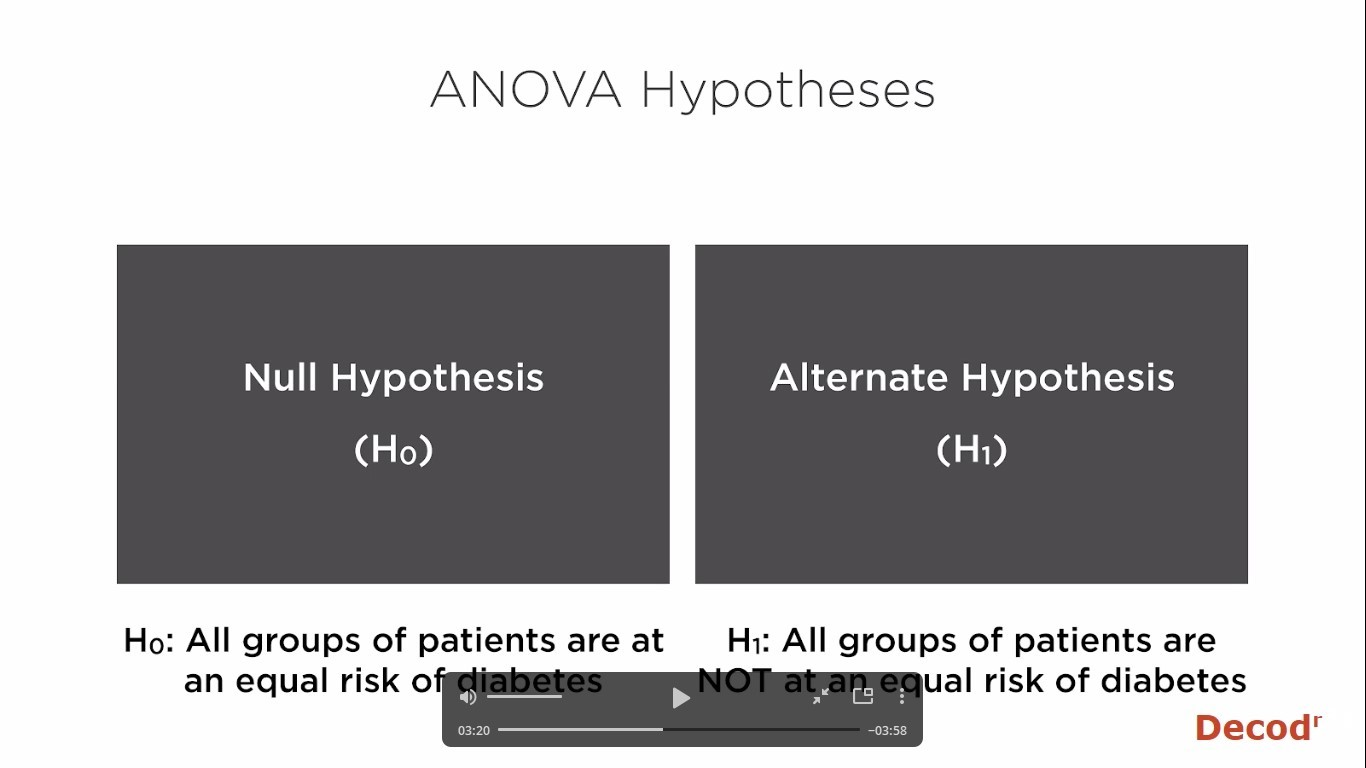

In [51]:
#ANOVA-- LOOKS ACROSS MULTIPLE GRPS/SAMPLES OF POPULATION,COMPARES THEIR MEANS TO PRODUCE...
#ONE SCORE AND ONE SIGNIFICANCE VALUE

In [52]:
#THE SCORE/THE TEST STATISTICS PRODUCED BY THE ANOVA TEST....IS CALLED AS "F-STATISTICS"
#F-STATISTICS--
#                VARIENCE B\W GRPS
#             F= ----------------------
#                VARIENCE WITHIN A GRP

In [53]:
#HERE "F-STATISTICS CORRESPONDS TO THE P-VALUE"
#IF THE GROUPS ARE SIMILAR,"F-STATISTICS WILL BE SIMILAR TO 1"....F=1(HERE "=" DENOTES SIMILAR..)
#IF THE GRPS ARE DIFF.."F-STATISTICS WILL BE LARGE"

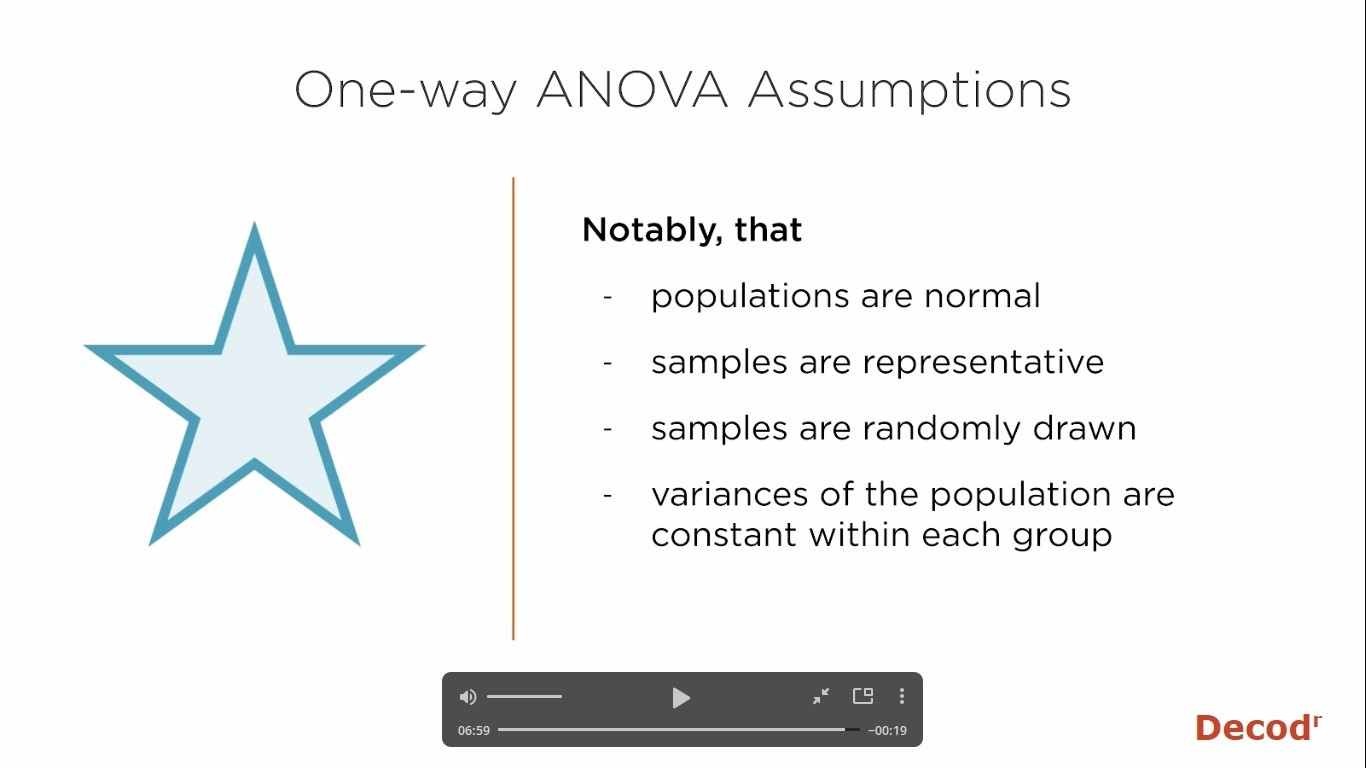

In [54]:
#ONE WAY ANOVA...DEMO/EXERCISE
#IMPORT STUFFS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
import researchpy as rp
from statsmodels.formula.api import ols

In [55]:
bike_sharing_data= pd.read_csv("D:DATASETS/bike_sharing_data.csv")
bike_sharing_data.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


In [56]:
bike_sharing_data.shape

(731, 7)

In [57]:
bike_sharing_data['weathersit'].unique()
# 1= DAY WAS CLEAR WITH SOME CLOUDS
# 2= MISTY AND A CLOUDY DAY
# 3= LIGHT SNOWS....RAIN OR THUNDER STORMS

array([2, 1, 3], dtype=int64)

In [58]:
bike_sharing_data.groupby("weathersit")["cnt"].describe().T

weathersit,1,2,3
count,463.000000,247.000000,21.000000
mean,4876.786177,4035.862348,1803.285714
std,1879.483989,1809.109918,1240.284449
min,431.000000,605.000000,22.000000
25%,3636.500000,2674.500000,705.000000
50%,4844.000000,4040.000000,1817.000000
75%,6458.500000,5257.500000,2424.000000
max,8714.000000,8362.000000,4639.000000


<AxesSubplot:title={'center':'cnt'}, xlabel='weathersit'>

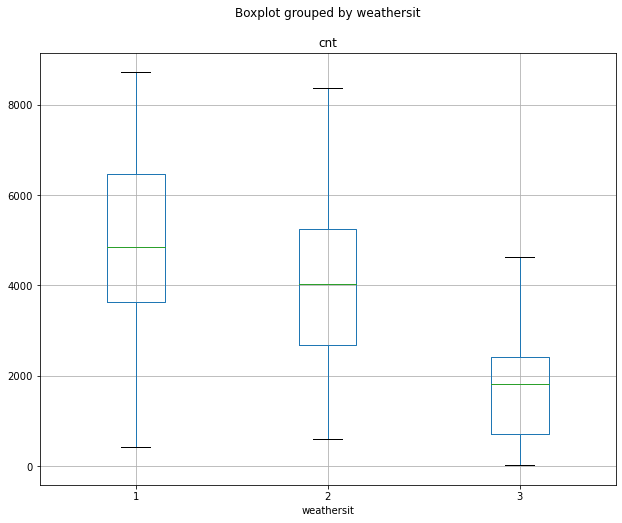

In [59]:
bike_sharing_data.boxplot(column=['cnt'],by = "weathersit",figsize=(10,8))

# the hypothesis being tested
$H0= NO DIFFERENCE B\W MEANS....

$H1= DIFF B\W MEANS EXIST SOMEWHERE...!

In [60]:
#ANOVA WITH SCIPY
stats.f_oneway(bike_sharing_data['cnt'][bike_sharing_data['weathersit']== 1],
              bike_sharing_data['cnt'][bike_sharing_data['weathersit']== 2],
              bike_sharing_data['cnt'][bike_sharing_data['weathersit']== 3])

F_onewayResult(statistic=40.06604492024684, pvalue=3.106317270053755e-17)

# post-hoc test by using "TUKEY'S method"

In [61]:
from statsmodels.stats.multicomp import MultiComparison
mul_com= MultiComparison(bike_sharing_data['cnt'], bike_sharing_data['weathersit'])
mul_result=mul_com.tukeyhsd()
print(mul_result)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
     1      2  -840.9238 0.001  -1181.639  -500.2086   True
     1      3 -3073.5005 0.001 -4038.2706 -2108.7304   True
     2      3 -2232.5766 0.001 -3215.4794 -1249.6738   True
-----------------------------------------------------------


# IN THE ABOVE STUFFS...WE'VE JUST SPOKEN ABOUT "ONE WAY ANOVA NOW WE ARE GONNA MOVE TO "TWO WAY ANOVA"...IN THE UPCOMING STUFFS

In [62]:
#TWO WAY ANOVA--
# IT EXAMINES THE INFLUENCE OF TWO DIFFERENT INDEPENDENT VARIABLES ON ONE CONTINUOUS DEPENDENT VARIABLE

IT SHOWS US THE "TWO DIFF INDEPENDENT VARIABLES".....!
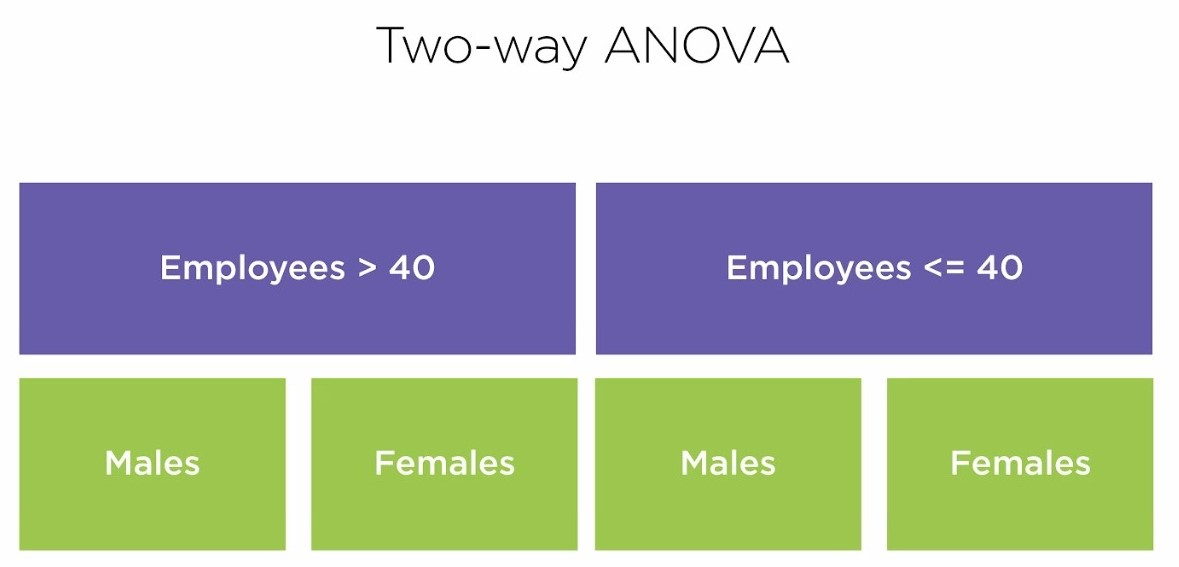

IT HAS THREE TYPES OF NULL HYPOTHESIS
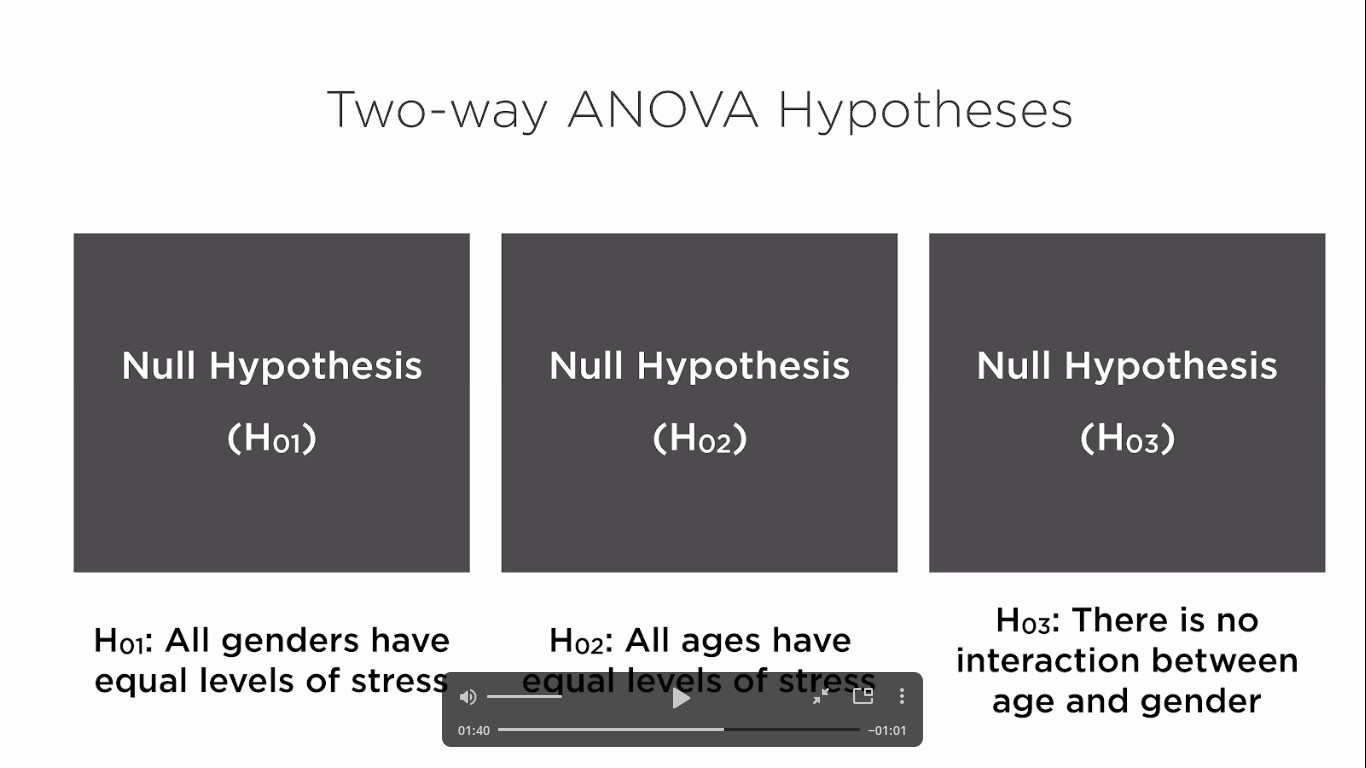

In [63]:
#TWO WAY ANOVA DEMO/EXCERCISE
#IMPORTING MODULES
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import researchpy as rp

from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [64]:
bike_sharing_data= pd.read_csv("D:DATASETS/bike_sharing_data.csv")
bike_sharing_data.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


In [65]:
bike_sharing_data['weathersit'].unique()
# 1= DAY WAS CLEAR WITH SOME CLOUDS
# 2= MISTY AND A CLOUDY DAY
# 3= LIGHT SNOWS....RAIN OR THUNDER STORMS

array([2, 1, 3], dtype=int64)

In [66]:
bike_sharing_data['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [67]:
#groupby method with the help of "researchpy module"
rp.summary_cont(bike_sharing_data.groupby(['weathersit']))['cnt']

C:\Users\Dell\ANACONDA\lib\site-packages\scipy\stats\_distn_infrastructure.py:2098: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\Dell\ANACONDA\lib\site-packages\scipy\stats\_distn_infrastructure.py:2099: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


,N,Mean,SD,SE,95% Conf.,Interval
weathersit,,,,,,
1,463,4876.7862,1879.4840,87.3470,4705.1395,5048.4329
2,247,4035.8623,1809.1099,115.1109,3809.1337,4262.5910
3,21,1803.2857,1240.2844,270.6523,1238.7150,2367.8564


<AxesSubplot:title={'center':'cnt'}, xlabel='weathersit'>

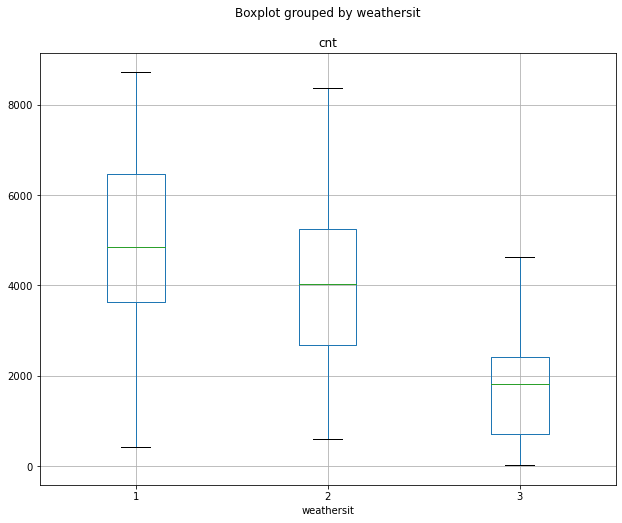

In [68]:
bike_sharing_data.boxplot(column=['cnt'],by = "weathersit",figsize=(10,8))

In [69]:
#groupby method with the help of "researchpy module"
rp.summary_cont(bike_sharing_data.groupby(['season']))['cnt']

,N,Mean,SD,SE,95% Conf.,Interval
season,,,,,,
1,181,2604.1326,1399.9421,104.0569,2398.8044,2809.4608
2,184,4992.3315,1695.9772,125.0291,4745.6476,5239.0154
3,188,5644.3032,1459.8004,106.4669,5434.2727,5854.3337
4,178,4728.1629,1699.6153,127.3915,4476.7612,4979.5647


<AxesSubplot:title={'center':'cnt'}, xlabel='season'>

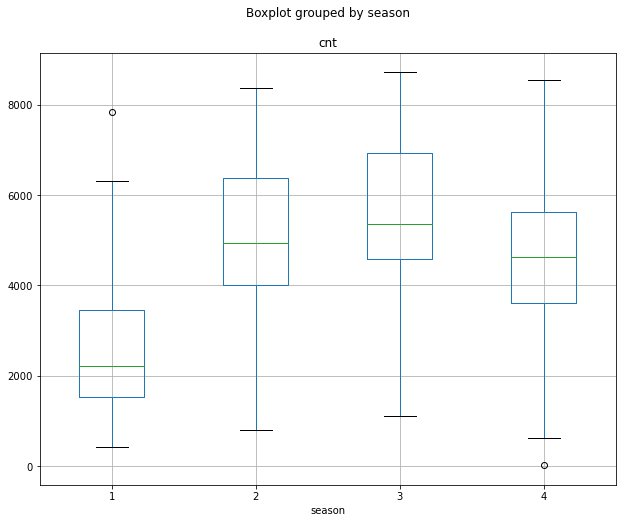

In [70]:
bike_sharing_data.boxplot(column=['cnt'],by = "season",figsize=(10,8))

# we are gonna find "F-STATISTICS" BY ols model